In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

from sklearn.mixture import GaussianMixture

import scipy.cluster.hierarchy as hiracy
from sklearn.cluster import AgglomerativeClustering

import warnings

In [2]:
warnings.filterwarnings('ignore')
df = pd.read_csv('Mall_Customers.csv')
%matplotlib inline
# plt.style.use('bmh')
plt.style.use('seaborn')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

----
# 观察

<AxesSubplot:xlabel='Age', ylabel='Density'>

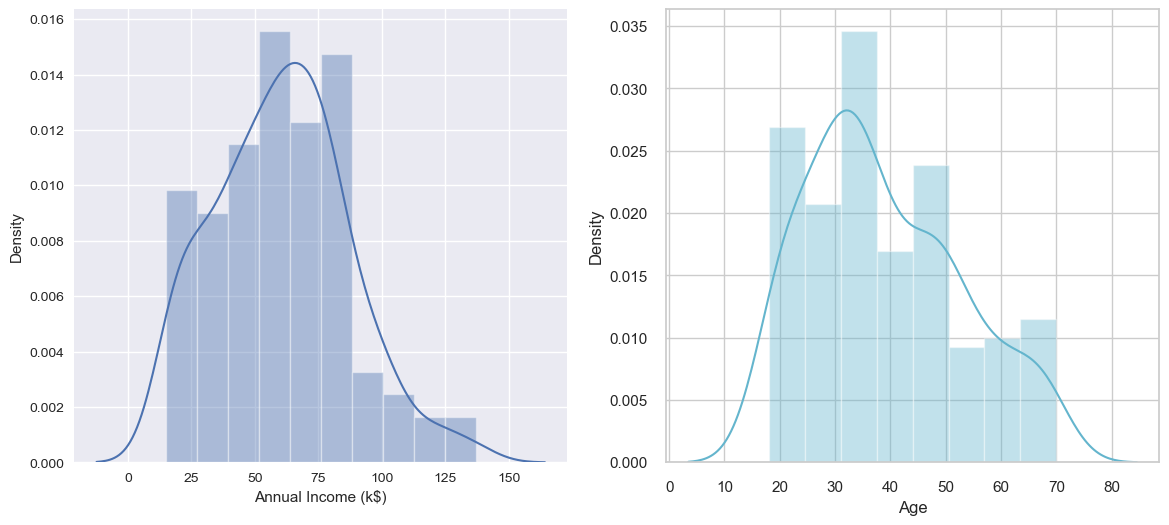

In [5]:
plt.figure(dpi=100, figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'], color='b')
plt.subplot(1,2,2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color='c')

In [6]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

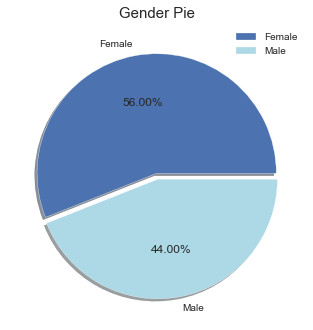

In [7]:

plt.style.use('seaborn')
plt.pie(labels=['Female', 'Male'], 
        x=df.Gender.value_counts(),
        explode=[0,0.05], 
        colors=['b', 'lightblue'],
        shadow=True,
        autopct='%.2f%%')
plt.title('Gender Pie', fontsize=15)
plt.legend()

Text(0.5, 1.0, 'Spend Count')

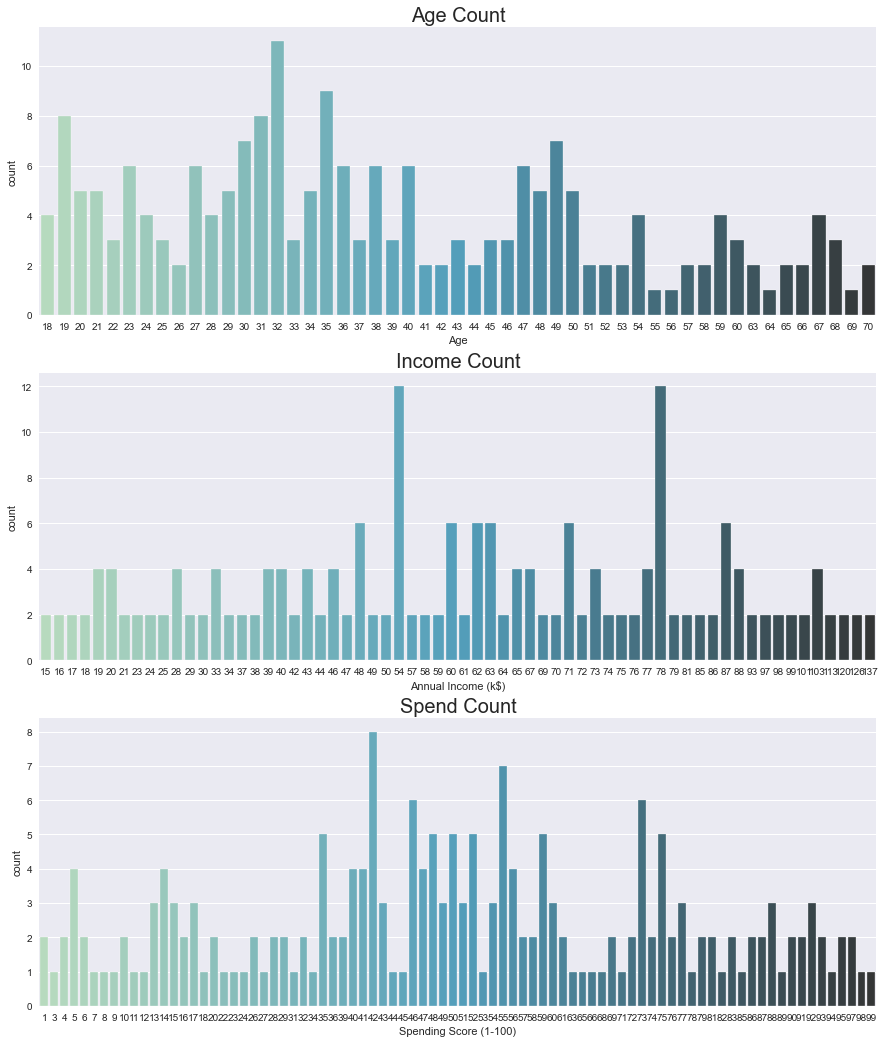

In [8]:
plt.figure(figsize=[15,18])
plt.subplot(3,1,1)
sns.countplot(df.Age,palette='GnBu_d')
plt.title('Age Count', fontsize=20)
plt.subplot(3,1,2)
sns.countplot(df['Annual Income (k$)'],palette='GnBu_d')
plt.title('Income Count', fontsize=20)
plt.subplot(3,1,3)
sns.countplot(df['Spending Score (1-100)'], palette='GnBu_d')
plt.title('Spend Count', fontsize=20)

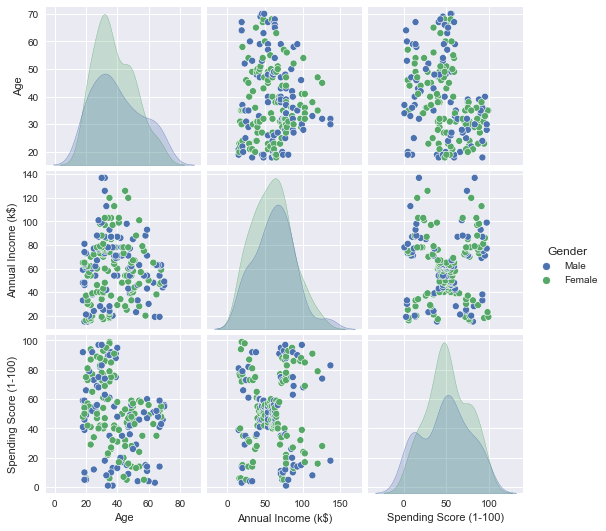

In [9]:
sns.pairplot(df.drop('CustomerID',axis=1),hue='Gender')

Text(0.5, 1.0, 'Correlation')

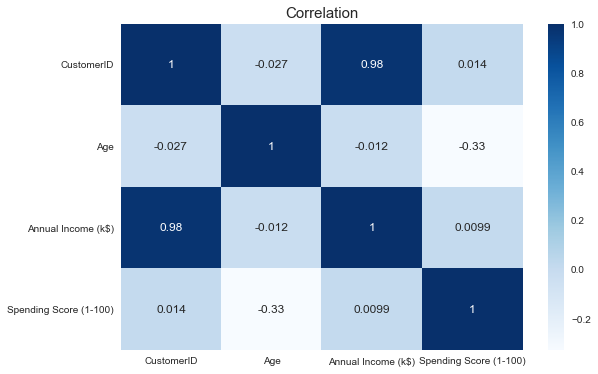

In [10]:
plt.figure(figsize=[9,6])
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation', fontsize=15)

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

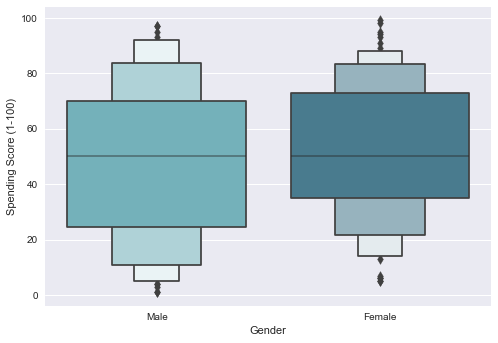

In [12]:
sns.boxenplot(
            y='Spending Score (1-100)',
            data=df,
            x='Gender', 
            palette='GnBu_d')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

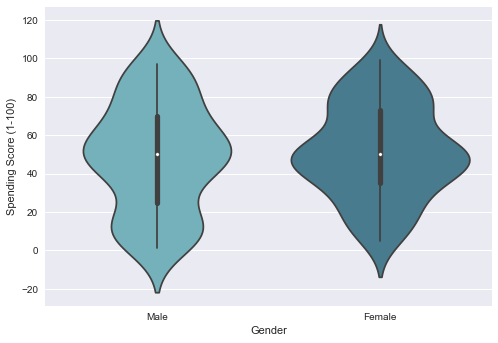

In [13]:
sns.violinplot(
            y='Spending Score (1-100)',
            data=df,
            x='Gender', 
            palette='GnBu_d')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

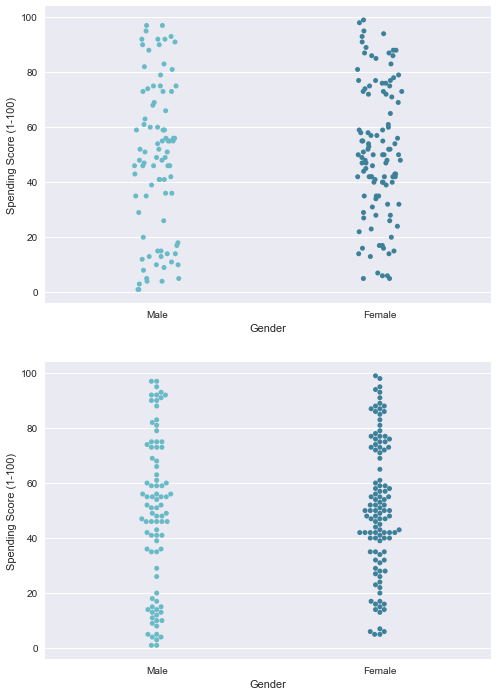

In [14]:
plt.figure(figsize=[8,12])
plt.subplot(2,1,1)
sns.stripplot(
            y='Spending Score (1-100)',
            data=df,
            x='Gender',   palette='GnBu_d')
plt.subplot(2,1,2)
sns.swarmplot(
            y='Spending Score (1-100)',
            data=df,
            x='Gender',   palette='GnBu_d')

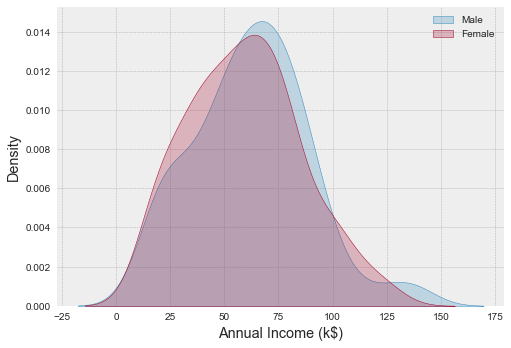

In [15]:
plt.style.use('bmh')
sns.kdeplot(df['Annual Income (k$)'].loc[df['Gender']=='Male'],
            # hist=False, 
            shade=True)
sns.kdeplot(df['Annual Income (k$)'].loc[df['Gender']=='Female'],
            # hist=False,
            shade=True)
plt.legend(['Male','Female'])

<Figure size 2400x1650 with 0 Axes>

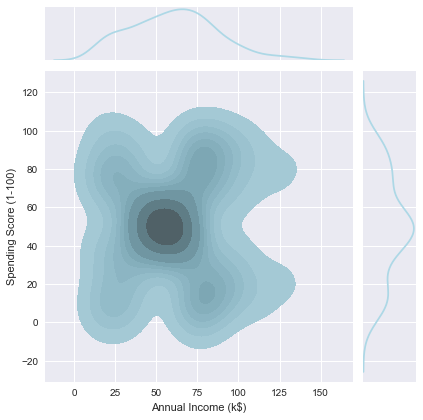

In [16]:

plt.style.use('seaborn')
plt.figure(dpi=300)
sns.jointplot(x='Annual Income (k$)',
            y='Spending Score (1-100)',
            data=df,
            # hue='Gender',
            kind='kde',
            shade=True,
            color='lightblue')
# plt.savefig('fig.jpg', dpi=300)

----
# 聚类

In [17]:
cluster_x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [18]:
total_sse=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,verbose=-1,
                random_state=42,n_jobs=-1)
    total_sse.append(km.fit(cluster_x).inertia_)


Initialization complete
Iteration 0, inertia 285884.0.
Iteration 1, inertia 269981.28000000014.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 797260.0.
Iteration 1, inertia 269981.28000000014.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 270332.0.
Iteration 1, inertia 269981.28000000014.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 875772.0.
Iteration 1, inertia 269981.28000000014.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 271180.0.
Iteration 1, inertia 269981.28000000014.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 310156.0.
Iteration 1, inertia 269981.28000000014.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 850660.0.
Iteration 1, inertia 269981.28000000014.
Converged at iteration 1: strict convergence.
Initia

([<matplotlib.axis.XTick at 0x1e2d842c710>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

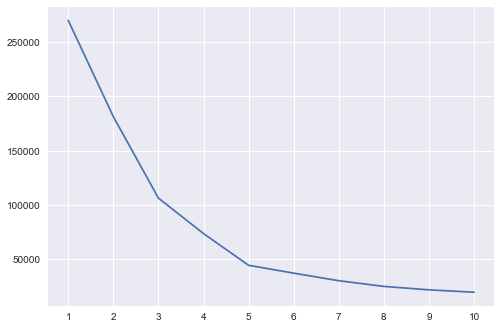

In [19]:
plt.plot(range(1,11),total_sse)
plt.xticks(range(1,11))

选择k=5

In [20]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

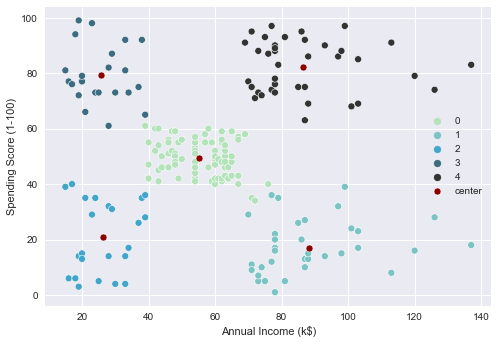

In [21]:
km = KMeans(n_clusters=5,random_state=42)
cluster = km.fit_predict(cluster_x)
df['Cluster'] = cluster
sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)', hue='Cluster',
                palette='GnBu_d')
sns.scatterplot(x=km.cluster_centers_[:,0],
                y=km.cluster_centers_[:,1],
                color='darkred',label='center')
# plt.legend([0,1,2,3,4])

In [22]:
df['Cluster'] = df['Cluster'].map({0:'general',
                                    1:'miser',
                                    2:'careful',
                                    3:'spendthrift',
                                    4:'target'})

<AxesSubplot:title={'center':'K-means Clustering'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

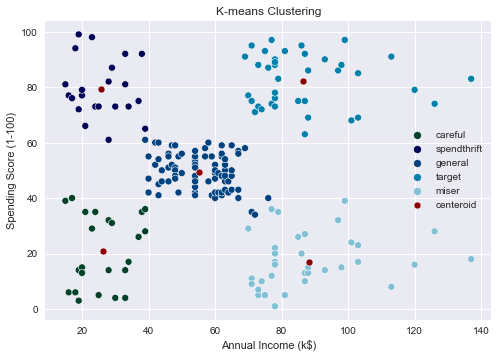

In [23]:
plt.title('K-means Clustering')
sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)', hue='Cluster',
                palette='ocean')
sns.scatterplot(x=km.cluster_centers_[:,0],
                y=km.cluster_centers_[:,1],
                color='darkred',label='centeroid')


Text(0, 0.5, 'Euc Dis')

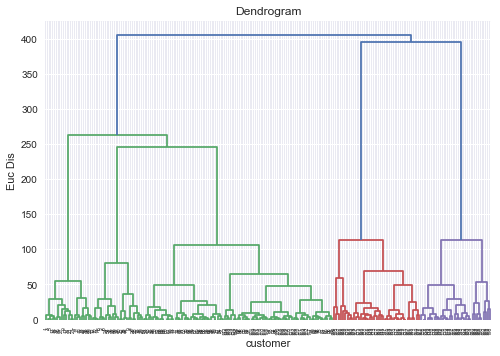

In [24]:
gram = hiracy.dendrogram(hiracy.linkage(cluster_x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('customer')
plt.ylabel('Euc Dis')


<AxesSubplot:title={'center':'Agglomerative Clustering'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

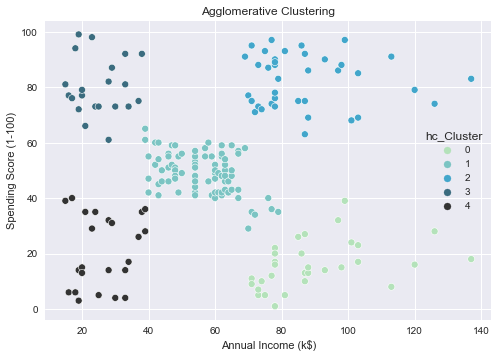

In [25]:
plt.title('Agglomerative Clustering')
hc = AgglomerativeClustering(n_clusters=5)
hs_cluster  = hc.fit_predict(cluster_x)
df['hc_Cluster'] = hs_cluster
sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)', hue='hc_Cluster',
                palette='GnBu_d')
# sns.scatterplot(x=hc.cluster_centers_[:,0],
#                 y=hc.cluster_centers_[:,1],
#                 color='darkred',label='center')

In [26]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,hc_Cluster
0,1,Male,19,15,39,careful,4
1,2,Male,21,15,81,spendthrift,3
2,3,Female,20,16,6,careful,4
3,4,Female,23,16,77,spendthrift,3
4,5,Female,31,17,40,careful,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,target,2
196,197,Female,45,126,28,miser,0
197,198,Male,32,126,74,target,2
198,199,Male,32,137,18,miser,0


([<matplotlib.axis.XTick at 0x1e2d90bf518>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

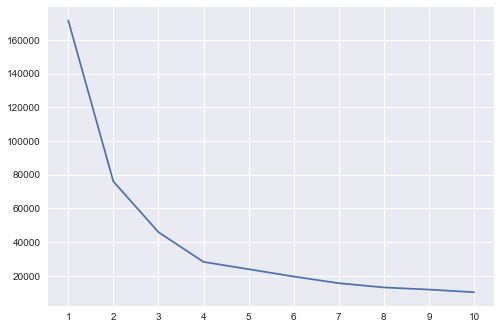

In [27]:

cluster_x1 = df[['Age','Spending Score (1-100)']]
total_sse=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,
                random_state=42,n_jobs=-1)
    total_sse.append(km.fit(cluster_x1).inertia_)
plt.plot(range(1,11),total_sse)
plt.xticks(range(1,11))

选k=4

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

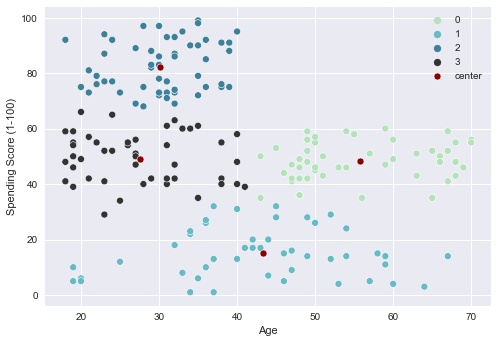

In [28]:
km = KMeans(n_clusters=4,random_state=42)
cluster = km.fit_predict(cluster_x1)
df['age_income_Cluster'] = cluster
sns.scatterplot(data=df, x='Age',
                y='Spending Score (1-100)', hue='age_income_Cluster',
                palette='GnBu_d')
sns.scatterplot(x=km.cluster_centers_[:,0],
                y=km.cluster_centers_[:,1],
                color='darkred',label='center')

([<matplotlib.axis.XTick at 0x1e2d91b3e10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

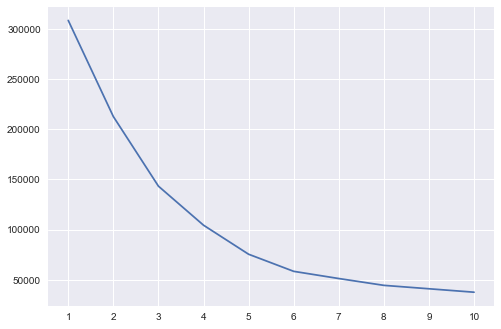

In [29]:
cluster_x2 = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
total_sse=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,
                random_state=42,n_jobs=-1)
    total_sse.append(km.fit(cluster_x2).inertia_)
plt.plot(range(1,11),total_sse)
plt.xticks(range(1,11))

In [30]:
km = KMeans(n_clusters=6,random_state=42)
cluster = km.fit_predict(cluster_x2)
df['3d_Cluster'] = cluster

In [31]:

triclusters = df.set_index('3d_Cluster')
triclusters.index.unique()


Int64Index([0, 3, 2, 4, 1, 5], dtype='int64', name='3d_Cluster')

Text(0.5, 0, 'Annual Income (k$)')

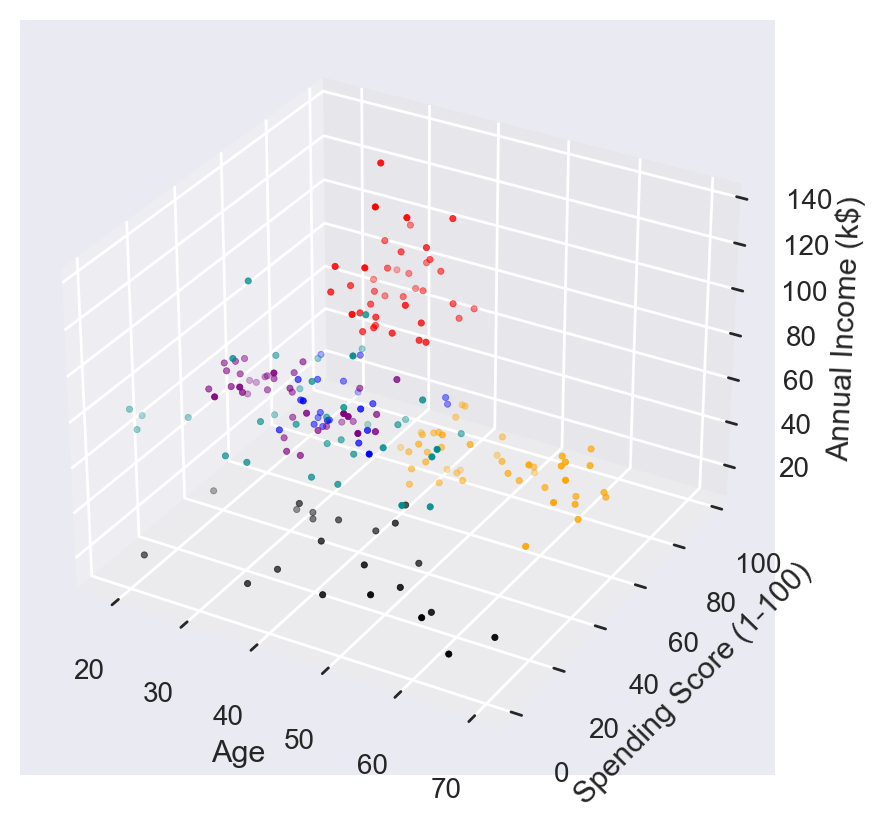

In [32]:

plt.figure(figsize=[8,5],dpi=200)
from mpl_toolkits.mplot3d import Axes3D
ax1 = plt.axes(projection='3d')
cmap = ['black','red','orange','blue','purple','darkcyan']
for i in triclusters.index.unique():
    temp = triclusters.loc[i]
    ax1.scatter3D(xs=temp['Age'],
                ys=temp['Spending Score (1-100)'],
                zs=temp['Annual Income (k$)'],
                marker='.',
                color=cmap[i]
                )
ax1.set_xlabel('Age')
ax1.set_ylabel('Spending Score (1-100)')
ax1.set_zlabel('Annual Income (k$)')
